# Project 2 Notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('Billionaires Statistics Dataset.csv')
data.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


In [2]:
# There are 2640 observations and 35 varibles.
data.shape

(2640, 35)

In [3]:
# Column names
data.columns

Index(['rank', 'finalWorth', 'category', 'personName', 'age', 'country',
       'city', 'source', 'industries', 'countryOfCitizenship', 'organization',
       'selfMade', 'status', 'gender', 'birthDate', 'lastName', 'firstName',
       'title', 'date', 'state', 'residenceStateRegion', 'birthYear',
       'birthMonth', 'birthDay', 'cpi_country', 'cpi_change_country',
       'gdp_country', 'gross_tertiary_education_enrollment',
       'gross_primary_education_enrollment_country', 'life_expectancy_country',
       'tax_revenue_country_country', 'total_tax_rate_country',
       'population_country', 'latitude_country', 'longitude_country'],
      dtype='object')

# Data quality and cleaning

In [4]:
# store the unused columns
columns_to_drop = ['residenceStateRegion', 'state', 'organization', 'date', 
                   'title', 'birthDate', 'birthMonth', 'birthDay', 'birthYear', 
                   'status', 'cpi_country','cpi_change_country','latitude_country',
                   'longitude_country','gross_tertiary_education_enrollment',
                   'gross_primary_education_enrollment_country', 'lastName', 'firstName',
                  'gdp_country', 'life_expectancy_country','tax_revenue_country_country',
                  'population_country','total_tax_rate_country']

# Identify columns from 'columns_to_drop' that exist in the 'data'
# and then remove those columns from 'data'.

# Remove specified columns from 'data', ignoring any columns that do not exist.
data.drop(columns=columns_to_drop, inplace=True, errors='ignore')

In [5]:
# Column names after droppoing the unused columns
data.columns

Index(['rank', 'finalWorth', 'category', 'personName', 'age', 'country',
       'city', 'source', 'industries', 'countryOfCitizenship', 'selfMade',
       'gender'],
      dtype='object')

In [6]:
# Construct a dictionary mapping each country to its continent.
continent_dict = {
    'Europe': ['France', 'Spain', 'Germany', 'Switzerland', 'Belgium', 'Austria', 'United Kingdom',
               'Monaco', 'Czech Republic', 'Sweden', 'Italy', 'Russia', 'Norway', 'Denmark', 
               'Netherlands', 'Poland', 'Greece', 'Ukraine', 'Georgia', 'Portugal', 'Latvia', 
               'Finland', 'Luxembourg', 'Ireland', 'Cyprus', 'Guernsey', 'Liechtenstein', 'Romania', 
               'Hungary', 'Andorra','Slovakia'],
    
    'North America': ['United States', 'Mexico', 'Canada', 'Bahamas', 'Cayman Islands', 'Bermuda', 
                      'British Virgin Islands', 'Turks and Caicos Islands'],
    
    'Asia': ['India', 'China', 'Hong Kong', 'Japan', 'Indonesia', 'United Arab Emirates', 'Thailand', 
             'Uzbekistan', 'Singapore', 'Israel', 'Malaysia', 'South Korea', 'Philippines', 'Taiwan', 
             'Kazakhstan', 'Vietnam', 'Cambodia', 'Lebanon', 'Oman', 'Qatar', 'Nepal', 'Bahrain', 'Armenia'
            ,"Turkey"],
    
    'Oceania': ['Australia', 'New Zealand'],
    
    'South America': ['Chile', 'Brazil', 'Colombia', 'Argentina', 'Uruguay', 'Peru'],
    
    'Africa': ['Nigeria', 'South Africa', 'Egypt', 'Eswatini (Swaziland)', 'Algeria', 'Morocco', 'Tanzania']
}

# The outer loop iterates over key-value pairs in continent_dict, 
# while the inner loop goes through each country in the list, 
# setting the country as the key and its continent as the value.
country_to_continent = {country: continent for continent, countries in continent_dict.items() 
                        for country in countries}

# Create a new 'continent' column in the dataframe. For each row, look up the 'country' column value 
# in the country_to_continent dictionary to determine its corresponding continent. 
data['continent'] = data['country'].map(country_to_continent)

# Check the new 'continent' column
print(data['continent'].value_counts())

Asia             1073
North America     818
Europe            591
South America      58
Oceania            45
Africa             17
Name: continent, dtype: int64


## Missing values

In [7]:
# Calculate the sum of missing values in each column
missing_values = data.isnull().sum()

# Calculate the percentage of missing values in each column
missing_percentage = (missing_values / len(data)) * 100

# Combine both count and percentage of missing values
missing_info = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
})

print(missing_info)

                      Missing Count  Missing Percentage
rank                              0            0.000000
finalWorth                        0            0.000000
category                          0            0.000000
personName                        0            0.000000
age                              65            2.462121
country                          38            1.439394
city                             72            2.727273
source                            0            0.000000
industries                        0            0.000000
countryOfCitizenship              0            0.000000
selfMade                          0            0.000000
gender                            0            0.000000
continent                        38            1.439394


In [8]:
# Remove rows where 'age' or 'country' have missing values
data = data.dropna(subset=['age', 'country'])

# Verify the operation by checking for missing values again
print(data.isnull().sum())

rank                     0
finalWorth               0
category                 0
personName               0
age                      0
country                  0
city                    32
source                   0
industries               0
countryOfCitizenship     0
selfMade                 0
gender                   0
continent                0
dtype: int64


In [9]:
# Final observations and variables aftering data cleaning
# There are 2549 observations and 13 variables
data.shape

(2549, 13)

## Summary Statistics

In [10]:
# Generate the summary statistics for the dataset
summary_stats = data.describe()
print(summary_stats)

              rank     finalWorth          age
count  2549.000000    2549.000000  2549.000000
mean   1276.801491    4704.236956    65.208709
std     740.509866    9989.223279    13.161253
min       1.000000    1000.000000    18.000000
25%     636.000000    1500.000000    56.000000
50%    1272.000000    2400.000000    65.000000
75%    1905.000000    4300.000000    75.000000
max    2540.000000  211000.000000   101.000000


In [11]:
# Convert 'finalWorth' from millions to billions
data['finalWorth'] = data['finalWorth'] / 1000

# Display the updated DataFrame
data.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,selfMade,gender,continent
0,1,211.0,Fashion & Retail,Bernard Arnault,74.0,France,Paris,LVMH,Fashion & Retail,France,False,M,Europe
1,2,180.0,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,True,M,North America
2,3,114.0,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,True,M,North America
3,4,107.0,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,True,M,North America
4,5,106.0,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,True,M,North America


In [12]:
# 1. Wealth Analysis:
# Average net worth
average_net_worth = data['finalWorth'].mean()

# Median net worth
median_net_worth = data['finalWorth'].median()

# Richest individuals based on finalWorth
richest_individuals = data.groupby('personName')['finalWorth'].sum().sort_values(ascending=False)

# 2. Source of Wealth Analysis:
# Most common source of wealth
popular_source = data['source'].value_counts().idxmax()

# Most prevalent industries
prevalent_industries = data['industries'].value_counts().idxmax()

# 3. Demographic Analysis:
# Distribution of billionaires by gender
gender_distribution = data['gender'].value_counts()

# 4. Geographic Analysis:
# Most common country of billionaires
popular_country = data['country'].value_counts().idxmax()

# Most common city of billionaires
popular_city = data['city'].value_counts().idxmax()

# 5. Age Analysis:
# Average age of billionaires
average_age = data['age'].mean()


print(f"Average net worth: ${average_net_worth} billion")
print(f"Median net worth: ${median_net_worth} billion")
print(f"Richest individual: {richest_individuals.idxmax()} with ${richest_individuals.max()} billion")
print(f"Most common source of wealth: {popular_source}")
print(f"Most prevalent industry: {prevalent_industries}")
print(f"Most common country of billionaires: {popular_country}")
print(f"Most common city of billionaires: {popular_city}")
print(f"Average age of billionaires: {average_age} years")
print("Distribution of billionaires by gender:\n", gender_distribution)

Average net worth: $4.7042369556688906 billion
Median net worth: $2.4 billion
Richest individual: Bernard Arnault with $211.0 billion
Most common source of wealth: Real estate
Most prevalent industry: Finance & Investments
Most common country of billionaires: United States
Most common city of billionaires: New York
Average age of billionaires: 65.20870929776383 years
Distribution of billionaires by gender:
 M    2247
F     302
Name: gender, dtype: int64


## Gender

In [13]:
# Get the counts of each gender
gender_counts = data['gender'].value_counts()
print(gender_counts)

M    2247
F     302
Name: gender, dtype: int64


In [14]:
females = data[data['gender'] == 'F']
richest_female = females.sort_values(by='finalWorth', ascending=False).iloc[0]
print(richest_female)

rank                                               11
finalWorth                                       80.5
category                             Fashion & Retail
personName              Francoise Bettencourt Meyers 
age                                              69.0
country                                        France
city                                            Paris
source                                        L'Oréal
industries                           Fashion & Retail
countryOfCitizenship                           France
selfMade                                        False
gender                                              F
continent                                      Europe
Name: 10, dtype: object


In [15]:
# Count the top 10 industries by gender
top_industries = data['category'].value_counts().head(10).index

top_industries_data = data[data['category'].isin(top_industries)]


gender_distribution = top_industries_data.groupby(['category', 'gender']).size().reset_index(name='count')

pivot_table = gender_distribution.pivot(index='category', columns='gender', values='count')

# calculate the female to male ratio
pivot_table['F_to_M_ratio'] = pivot_table['F'] / pivot_table['M']

# Print table with the ratio
print(pivot_table)

gender                  F    M  F_to_M_ratio
category                                    
Diversified            27  155      0.174194
Energy                  8   89      0.089888
Fashion & Retail       37  218      0.169725
Finance & Investments  24  337      0.071217
Food & Beverage        40  160      0.250000
Healthcare             25  170      0.147059
Manufacturing          39  272      0.143382
Media & Entertainment   9   76      0.118421
Real Estate            20  169      0.118343
Technology             28  279      0.100358


## Final Worth

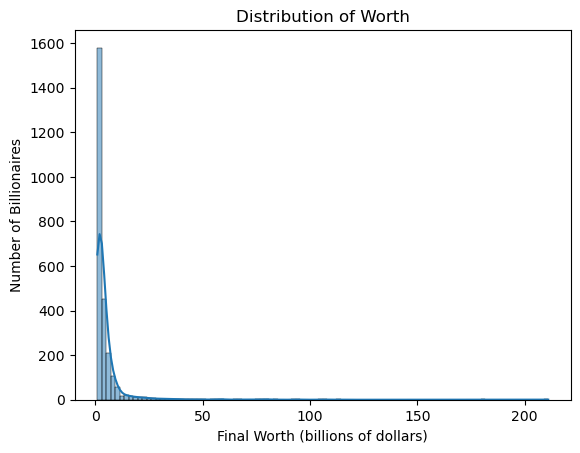

In [16]:
# Plot a histogram of wealth distribution
sns.histplot(data['finalWorth'], bins=100, kde=True)
plt.title("Distribution of Worth")              # Title of the plot
plt.xlabel("Final Worth (billions of dollars)") # X-axis label
plt.ylabel("Number of Billionaires")            # Y-axis label
plt.show()                                      # Display the plot

In [17]:
# Count the number of data points in each bin
counts, bin_edges = np.histogram(data['finalWorth'], bins=100)

# Create a DataFrame to store the bin ranges and counts
bin_ranges = pd.DataFrame({
    'BinRangeMin': bin_edges[:-1],
    'BinRangeMax': bin_edges[1:],
    'Count': counts
})

# Find the range of the first bin where the majority of data points lie
first_bin_range = bin_ranges.iloc[0]

# To print out the first bin range
print(f"The first bin range is from {first_bin_range['BinRangeMin']} to {first_bin_range['BinRangeMax']} with a count of {first_bin_range['Count']}")

The first bin range is from 1.0 to 3.1 with a count of 1579.0


## Self-Made vs Inherited Wealth

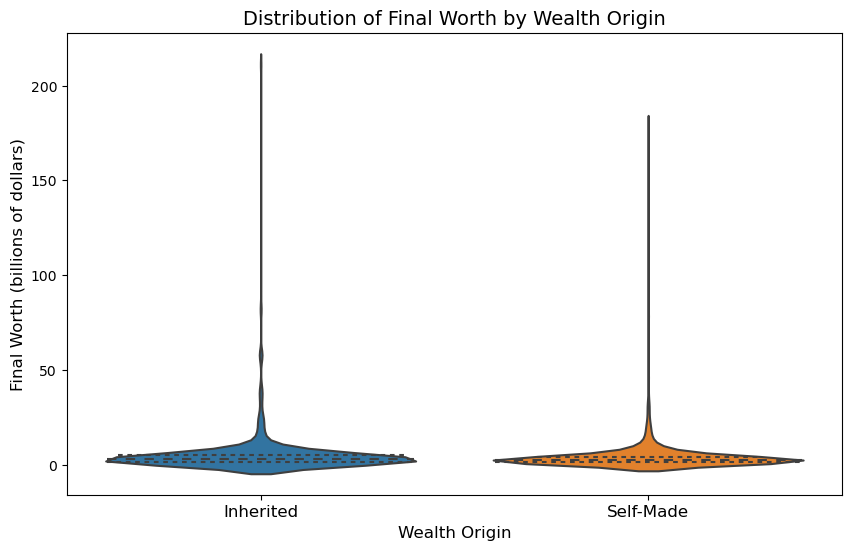

In [18]:
# Convert the 'selfMade' column to numeric values: True to 1, False to 0
data['selfMade_numeric'] = data['selfMade'].astype(int)

# Generate the violin plot
plt.figure(figsize=(10, 6)) # Set the size of the plot
sns.violinplot(
    x='selfMade_numeric', 
    y='finalWorth', 
    data=data, 
    split=True, 
    inner='quartile',
    scale='width' # This scales the violins to the same width
)

# Customize the plot with title, labels, and custom x-ticks
plt.title('Distribution of Final Worth by Wealth Origin', fontsize=14)
plt.xlabel('Wealth Origin', fontsize=12)
plt.ylabel('Final Worth (billions of dollars)', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Inherited', 'Self-Made'], fontsize=12) # Setting custom labels for the x-axis
plt.show()

In [19]:
self_made_descriptive = data[data['selfMade']]['finalWorth'].describe(percentiles=[.25, .5, .75])
inherited_descriptive = data[~data['selfMade']]['finalWorth'].describe(percentiles=[.25, .5, .75])

# Printing out the descriptive statistics for both groups
print("Self-Made Billionaires' Descriptive Statistics:")
print(self_made_descriptive)
print("\nInherited Billionaires' Descriptive Statistics:")
print(inherited_descriptive)

Self-Made Billionaires' Descriptive Statistics:
count    1780.000000
mean        4.509775
std         9.532748
min         1.000000
25%         1.500000
50%         2.200000
75%         4.100000
max       180.000000
Name: finalWorth, dtype: float64

Inherited Billionaires' Descriptive Statistics:
count    769.000000
mean       5.154356
std       10.966593
min        1.000000
25%        1.600000
50%        2.700000
75%        4.900000
max      211.000000
Name: finalWorth, dtype: float64


## Age

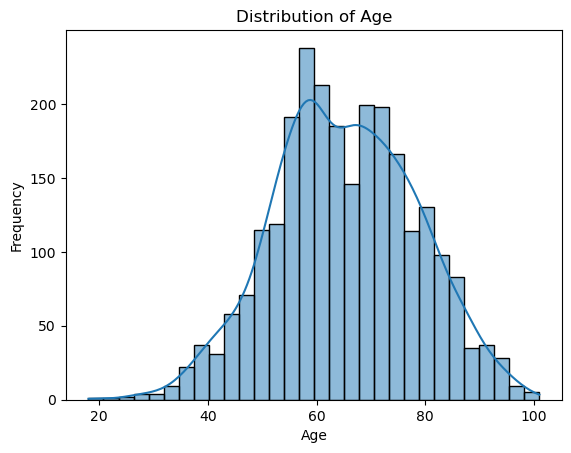

In [20]:
# Plot a histogram of age distribution
sns.histplot(data['age'], bins=30, kde=True)
plt.title("Distribution of Age") # Title of the plot
plt.xlabel("Age")                # X-axis label
plt.ylabel("Frequency")          # Y-axis label
plt.show()                       # Display the plot

## Regression on Age

In [21]:
import statsmodels.api as sm

Y = data['finalWorth']
X = data[['age']]
Xfull = sm.add_constant(X)

model = sm.OLS(Y, Xfull).fit()

model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             finalWorth   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     11.35
Date:                Tue, 14 Nov 2023   Prob (F-statistic):           0.000764
Time:                        16:30:57   Log-Likelihood:                -9477.2
No. Observations:                2549   AIC:                         1.896e+04
Df Residuals:                    2547   BIC:                         1.897e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4070      0.998      1.410      0.159      -0.550       3.364
age            0.0506      0.015      3.370      0.001       0.021       0.080
==============================================================================
Omnibus:                     4005.515   Durbin-Watson:                   0.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2161144.209
Skew:                           9.887   Prob(JB):                         0.00
Kurtosis:                     144.270   Cond. No.                         336.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

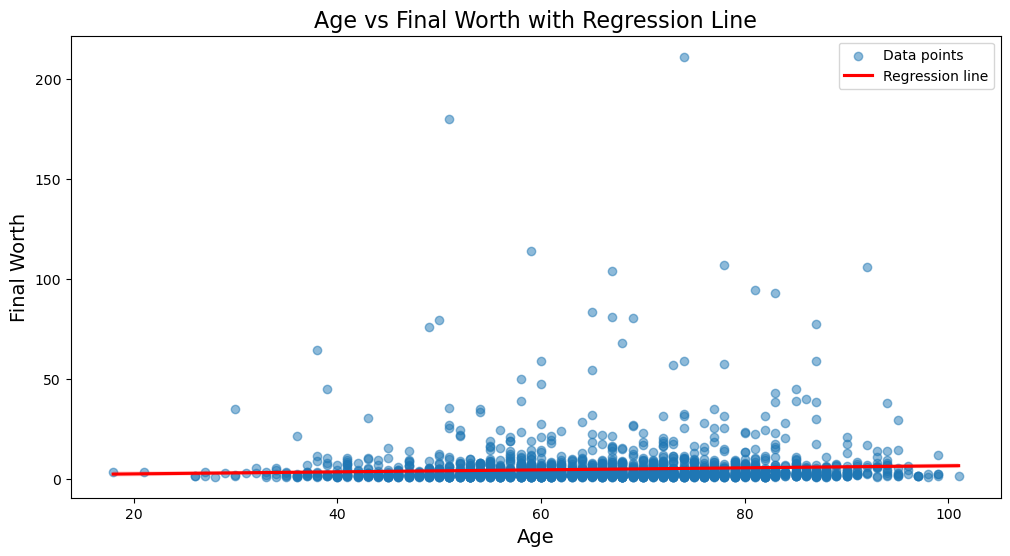

In [22]:
# Visualization
plt.figure(figsize=(12, 6))

# Scatter plot
plt.scatter(X['age'], Y, alpha=0.5, label='Data points')

# Regression line
sns.regplot(x='age', y='finalWorth', data=data, scatter=False, label='Regression line', color='red')

plt.title('Age vs Final Worth with Regression Line', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Final Worth', fontsize=14)
plt.legend()
plt.show()

## Industry

In [23]:
# Group by industry and count the number of billionaires in each
billionaire_count_by_industry = data.groupby('category')['personName'].count().sort_values(ascending=False)

# Get the top 10 industries with the most billionaires
top_10_industries = billionaire_count_by_industry.head(10)

# Print the result
print(top_10_industries)

category
Finance & Investments    361
Manufacturing            311
Technology               307
Fashion & Retail         255
Food & Beverage          200
Healthcare               195
Real Estate              189
Diversified              182
Energy                    97
Media & Entertainment     85
Name: personName, dtype: int64


In [24]:
# Analyze industries for young billionaires 18-45)
young_billionaires = data[(data['age'] >= 18) & (data['age'] <= 45)]
top_industries_young = young_billionaires['category'].value_counts().head(5)  # Replace 'category' with the correct column name for industries if different
print("Top Industries for Young Billionaires (18-45):")
print(top_industries_young)

# Analyze gender distribution for young billionaires 18-45)
gender_distribution_young = young_billionaires['gender'].value_counts()  # Replace 'gender' with the correct column name if different
print("\nGender Distribution for Young Billionaires (18-45):")
print(gender_distribution_young)

# Analyze industries for older billionaires (45+)
older_billionaires = data[data['age'] > 45]
top_industries_older = older_billionaires['category'].value_counts().head(5)  # Replace 'category' with the correct column name for industries if different
print("\nTop Industries for Older Billionaires (45+):")
print(top_industries_older)

# Analyze gender distribution for older billionaires (45+)
gender_distribution_older = older_billionaires['gender'].value_counts()  # Replace 'gender' with the correct column name if different
print("\nGender Distribution for Older Billionaires (45+):")
print(gender_distribution_older)

Top Industries for Young Billionaires (18-45):
Technology               60
Finance & Investments    22
Fashion & Retail         16
Media & Entertainment    12
Food & Beverage          10
Name: category, dtype: int64

Gender Distribution for Young Billionaires (18-45):
M    141
F     28
Name: gender, dtype: int64

Top Industries for Older Billionaires (45+):
Finance & Investments    339
Manufacturing            305
Technology               247
Fashion & Retail         239
Food & Beverage          190
Name: category, dtype: int64

Gender Distribution for Older Billionaires (45+):
M    2106
F     274
Name: gender, dtype: int64


## Continent

In [25]:
import geopandas as gpd

# pip install geopandas : copy paste that in your terminal so that you can run this part

# Group by 'continent' to get the number of billionaires
billionaire_by_continent = data.groupby('continent')['personName'].count().reset_index()

# Visualization: Heatmap on a world map showing billionaire density by continent.
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Add a 'Continent' column to the `world` dataframe for merging purposes
world['Continent'] = world['continent']

# Merge our billionaire data with the world dataframe
merged_world = world.set_index('Continent').join(billionaire_by_continent.set_index('continent'))

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
merged_world.plot(column='personName', ax=ax, legend=True,cmap='coolwarm', 
                  legend_kwds={'label': "Number of Billionaires by Continent"})
plt.show()

# Print the billionaire count by continent
print(billionaire_by_continent)

ModuleNotFoundError: No module named 'geopandas'

In [ ]:
# Group by 'continent' and 'category' to get the number of billionaires in each industry
billionaire_industry_by_continent = data.groupby(['continent', 'category'])['personName'].count().reset_index(name='count')

# Sort the data within each continent group for better readability
billionaire_industry_by_continent_sorted = billionaire_industry_by_continent.sort_values(by=['continent', 'count'], ascending=[True, False])

# Create a function to get the top 5 industries for each continent
def top_5_industries(data):
    return data.sort_values(by='count', ascending=False).head(5)


top_industries_by_continent = billionaire_industry_by_continent_sorted.groupby('continent').apply(top_5_industries)

top_industries_by_continent.reset_index(drop=True, inplace=True)

print(top_industries_by_continent)